In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'seaborn'

#3

In [ ]:
df = pd.read_csv("/content/OnlineRetail_encoded.csv")
display(df.shape)
display(df.head())

(232301, 32)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,AvgQuantityByProduct,TotalQuantityByCountry,...,Country_Brasil,Country_Chile,Country_Colombia,Country_Costa Rica,Country_Ecuador,Country_México,Country_Paraguay,Country_Perú,Country_Uruguay,Country_Venezuela
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,17.595,17850,105.570,8.810413,126514.5,...,0,0,0,0,0,0,0,0,0,0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,23.391,17850,140.346,4.842105,126514.5,...,0,0,0,0,0,0,0,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2255.000,17850,18040.000,5.713740,126171.5,...,0,1,0,0,0,0,0,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,24.408,17850,146.448,6.489083,124909.5,...,0,0,0,0,0,0,1,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,17.967,17850,107.802,6.203629,125387.5,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df['competence'] = df['UnitPrice'].mean()
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,AvgQuantityByProduct,TotalQuantityByCountry,...,Country_Chile,Country_Colombia,Country_Costa Rica,Country_Ecuador,Country_México,Country_Paraguay,Country_Perú,Country_Uruguay,Country_Venezuela,competence
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,17.595,17850,105.570,8.810413,126514.5,...,0,0,0,0,0,0,0,0,0,7605.873753
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,23.391,17850,140.346,4.842105,126514.5,...,0,0,0,0,0,0,0,0,0,7605.873753
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2255.000,17850,18040.000,5.713740,126171.5,...,1,0,0,0,0,0,0,0,0,7605.873753
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,24.408,17850,146.448,6.489083,124909.5,...,0,0,0,0,0,1,0,0,0,7605.873753
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,17.967,17850,107.802,6.203629,125387.5,...,0,0,0,0,0,0,0,0,0,7605.873753


In [ ]:
top_10_stocks = df.groupby('StockCode')['Total_Quantity_Sold'].sum().nlargest(10).index
df_top_products = df[df['StockCode'].isin(top_10_stocks)].copy()
print(f"Top 10 StockCodes identified: {top_10_stocks.tolist()}")
display(df_top_products.head())

KeyError: 'Column not found: Total_Quantity_Sold'

In [ ]:
country_cols = [col for col in df_top_products.columns if col.startswith('Country_')]

df_country_sales = df_top_products.groupby('StockCode').apply(lambda x: x[country_cols].multiply(x['Total_Quantity_Sold'], axis=0).sum()).reset_index()

# Rename columns to remove 'Country_' prefix for better readability in heatmap if needed, but not explicitly asked.
# df_country_sales.columns = ['StockCode'] + [col.replace('Country_', '') for col in country_cols]

display(df_country_sales.head())

/tmp/ipython-input-1241882487.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_country_sales = df_top_products.groupby('StockCode').apply(lambda x: x[country_cols].multiply(x['Total_Quantity_Sold'], axis=0).sum()).reset_index()


,StockCode,Country_Argentina,Country_Bolivia,Country_Brasil,Country_Chile,Country_Colombia,Country_Costa Rica,Country_Ecuador,Country_México,Country_Paraguay,Country_Perú,Country_Uruguay,Country_Venezuela
0,20725,351.5,554.5,591.0,475.0,515.5,423.5,506.5,321.0,389.0,531.5,650.0,577.0
1,21212,700.5,590.5,487.0,770.5,647.5,691.0,977.0,804.5,541.5,747.0,706.0,597.0
2,22086,346.0,551.0,368.0,282.0,373.0,385.5,468.0,492.0,406.0,326.5,366.0,621.5
3,22178,410.0,494.0,379.0,518.5,380.5,633.0,444.0,293.5,591.0,474.5,549.5,542.5
4,22197,527.0,559.5,380.0,633.0,902.0,892.5,586.0,582.0,729.5,681.5,733.0,560.5


In [ ]:
country_cols = [col for col in df_top_products.columns if col.startswith('Country_')]

# Multiply Total_Quantity_Sold by each country's one-hot encoded column
df_temp_sales = df_top_products[country_cols].multiply(df_top_products['Total_Quantity_Sold'], axis=0)

# Add 'StockCode' back to df_temp_sales for grouping
df_temp_sales['StockCode'] = df_top_products['StockCode']

# Group by 'StockCode' and sum the country sales
df_country_sales = df_temp_sales.groupby('StockCode')[country_cols].sum().reset_index()

# Rename columns to remove 'Country_' prefix for better readability in heatmap if needed, but not explicitly asked.
# df_country_sales.columns = ['StockCode'] + [col.replace('Country_', '') for col in country_cols]

display(df_country_sales.head())

,StockCode,Country_Argentina,Country_Bolivia,Country_Brasil,Country_Chile,Country_Colombia,Country_Costa Rica,Country_Ecuador,Country_México,Country_Paraguay,Country_Perú,Country_Uruguay,Country_Venezuela
0,20725,351.5,554.5,591.0,475.0,515.5,423.5,506.5,321.0,389.0,531.5,650.0,577.0
1,21212,700.5,590.5,487.0,770.5,647.5,691.0,977.0,804.5,541.5,747.0,706.0,597.0
2,22086,346.0,551.0,368.0,282.0,373.0,385.5,468.0,492.0,406.0,326.5,366.0,621.5
3,22178,410.0,494.0,379.0,518.5,380.5,633.0,444.0,293.5,591.0,474.5,549.5,542.5
4,22197,527.0,559.5,380.0,633.0,902.0,892.5,586.0,582.0,729.5,681.5,733.0,560.5


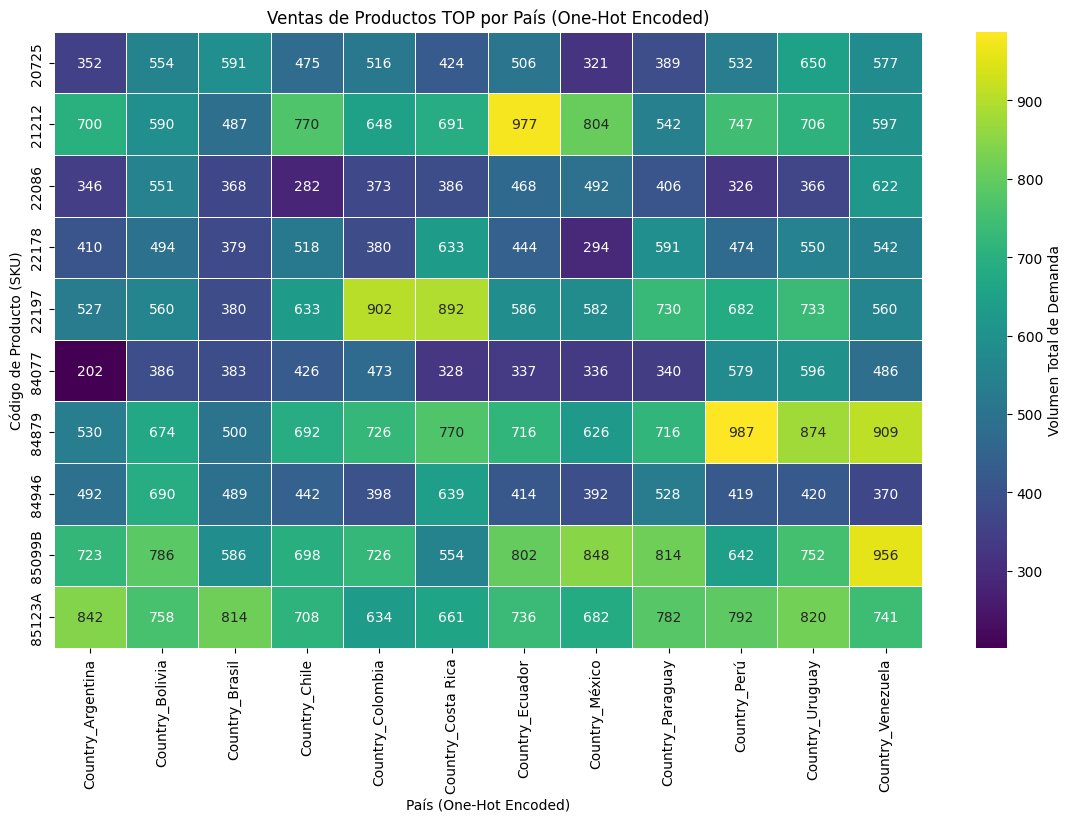

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set StockCode as index for heatmap visualization
df_country_sales_pivot = df_country_sales.set_index('StockCode')

plt.figure(figsize=(14, 8))
sns.heatmap(
    df_country_sales_pivot,
    cmap='viridis',
    annot=True,
    fmt=".0f",
    linewidths=.5,
    cbar_kws={'label': 'Volumen Total de Demanda'}
)
plt.title('Ventas de Productos TOP por País (One-Hot Encoded)')
plt.ylabel('Código de Producto (SKU)')
plt.xlabel('País (One-Hot Encoded)')
plt.show()

In [ ]:
# A. Selección de datos para el análisis OLS (Usar el mismo producto popular que en Fase 2)
TARGET_COUNTRY = 'MEXICO'
# NOTA: Reemplaza '22423' si tu producto más vendido fue otro.
TARGET_STOCK = '22423'

df_plot = df[
    (df['Country'] == TARGET_COUNTRY) &
    (df['StockCode'] == TARGET_STOCK) &
    (df['Total_Quantity_Sold'] > 0) &
    (df['UnitPrice'] > 0)
].copy()

# B. Transformación Log-Log
df_plot['log_Quantity'] = np.log(df_plot['Total_Quantity_Sold'])
df_plot['log_Price'] = np.log(df_plot['UnitPrice'])

# C. Entrenar el modelo OLS (solo para obtener la línea de regresión)
X = sm.add_constant(df_plot['log_Price'])
Y = df_plot['log_Quantity']
model = sm.OLS(Y, X).fit()
elasticity = model.params['log_Price']

# D. Generación del Gráfico
plt.figure(figsize=(10, 6))
sns.regplot(x='log_Price', y='log_Quantity', data=df_plot, scatter_kws={'alpha':0.6, 'color':'blue'})

plt.title(f'Curva de Elasticidad Precio-Demanda para {TARGET_STOCK} en {TARGET_COUNTRY}')
plt.xlabel(f'Log(Precio en {df_plot["Local_Currency"].iloc[0]})')
plt.ylabel('Log(Demanda)')
plt.text(
    0.05, 0.90,
    f'Elasticidad (Pendiente): {elasticity:.2f}\nInterpretación: {"ELÁSTICO (Sensible)" if elasticity < -1 else "INELÁSTICO (Oportunidad de Margen)"}',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='yellow', alpha=0.6, edgecolor='gray')
)
plt.show()

KeyError: 'Country'

#4

RMSE (Error de Predicción) replicado: 13.28


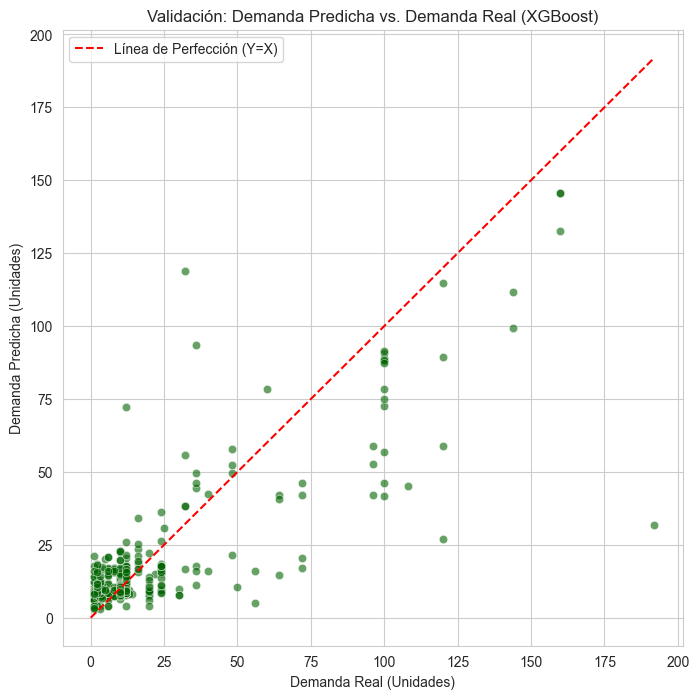

In [ ]:
# A. Recrear X_test y Y_test (Debemos replicar el split de la Fase 3)
# 1. Preparación de Variables para XGBoost (igual que en Fase 3)
df_model_full = pd.get_dummies(df.drop(columns=['InvoiceDate', 'Local_Currency']),
                               columns=['StockCode', 'Country'])
X = df_model_full.drop(columns=['Total_Quantity_Sold'])
Y = df_model_full['Total_Quantity_Sold']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# 2. Re-entrenamiento del modelo (Necesario si no está en memoria)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred = xgb_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"RMSE (Error de Predicción) replicado: {rmse:.2f}")

# B. Preparación de datos para la gráfica
sample_size = 500
df_results = pd.DataFrame({
    'Actual': Y_test.head(sample_size).values,
    'Predicted': Y_pred[:sample_size]
})

# C. Generación del Gráfico
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Actual', y='Predicted', data=df_results, alpha=0.6, color='darkgreen')

# Dibujar la línea de perfección (Y=X)
max_val = df_results[['Actual', 'Predicted']].max().max()
plt.plot([0, max_val], [0, max_val], 'r--', label='Línea de Perfección (Y=X)')

plt.title('Validación: Demanda Predicha vs. Demanda Real (XGBoost)')
plt.xlabel('Demanda Real (Unidades)')
plt.ylabel('Demanda Predicha (Unidades)')
plt.legend()
plt.show()